El ejercicio que se presenta a continuación se refiere al análisis de una de las ecuaciones presentadas en las diapositivas de la Lección 1, utilizando los métodos hasta ahora aprendidos y toda la información adicional que sea necesaria. La función elegida es el mapa del cubo:

<h1>  $$x_{n+1} = r \cdot x_{n}^2 \cdot (1 - x_{n})$$  </h1>

En primer lugar, debemos identificar las regiones de parámetros que producen una dinámica significativa. Suponiendo que r > 0, la mayor descendencia posible se produce cuando la función se maximiza; es decir, cuando su derivada = 0 así:

In [1]:
import sympy as sp

In [2]:
#Defino las variables matemáticas en uso
x, r= sp.symbols(' x, r ')
#Y la función sobre la que trabajo
f = r*x**2*(1-x)
f

r*x**2*(1 - x)

In [3]:
#Calculo su derivada
derivada = sp.simplify(sp.diff(f, x))
derivada

r*x*(2 - 3*x)

In [4]:
#Y resuelvo para derivada = 0
sp.solve(derivada, x)

[0, 2/3]

In [5]:
maxval = f.subs({"x":2/3})
maxval # This equals 4/27, trust me

0.148148148148148*r

Podemos concluir que el valor máximo de descendencia se producirá cuando x = $\frac{2}{3}$. Así, vemos que el valor máximo de $ x_{n+1} $ es $r \cdot \frac{4}{27}$ (al sustituir el valor en la función inicial. Es decir, que los valores interesantes de r estarán entre 0 y 27/4, es decir, 6.75

A continuación, pasamos a calcular los puntos fijos. Estos son aquellos en los que f(x) = x, por lo que, dado el mapa del cubo, tendríamos:

In [6]:
#Y resuelvo para f(x) = x
criticos = sp.solve(f-x, x)
criticos

[0, 1/2 - sqrt(r*(r - 4))/(2*r), 1/2 + sqrt(r*(r - 4))/(2*r)]

Es decir: los puntos estables son 0 (la solución trivial) y:

In [7]:
sp.simplify(criticos[1])

(r - sqrt(r*(r - 4)))/(2*r)

In [8]:
sp.simplify(criticos[2])

(r + sqrt(r*(r - 4)))/(2*r)

Ahora, ¿son estos puntos estables? Es decir, ante pequeñas perturbaciones, ¿la función vuelve sola al punto fijo, o se escapa? Para saberlo, debemos recurrir a la condición de estabilidad general: $|f'(x^{*})| < 1$; esto es así porque, para tener estabilidad, la pendiente de la función en el punto de equilibrio debe estar contenida entre -1 y 1, las pendientes de las rectas a 45º y -45º, respectivamente. En el caso que nos ocupa:

In [9]:
#Calculamos la expresión que nos dirá para que valores de r el punto es estable, y para cuales no 
condicion_estable_pt1 = sp.simplify(derivada.subs({"x":criticos[1]}))
condicion_estable_pt1 #Que tiene que estar entre -1 y 1 para ser estable

-r/2 + sqrt(r*(r - 4))/2 + 3

In [10]:
sp.solve(sp.Abs(condicion_estable_pt1) < 1) #Fun fact: si no lo llevo simplificado no me lo resuelve

False

In [11]:
#Repetimos para x2
condicion_estable_pt2 = sp.simplify(derivada.subs({"x":criticos[2]}))
condicion_estable_pt2

-r/2 - sqrt(r*(r - 4))/2 + 3

In [12]:
sp.solve(sp.Abs(condicion_estable_pt2) < 1) 

(4 < r) & (r < 16/3)

Ante los resultados anteriores, podemos conjeturar que el primer punto fijo no trivial, llamemosle $x_{1}$, es inestable: no valor de r tal que la condición de estabilidad se verifique. Respecto al segundo punto no trivial, llamemosle $x_{2}$, vemos que, efectivamente, SI que hay una serie de valores para los cuales es estable: aquellos en los que r sea mayor de 4 pero menor de 16/3, esto es, 5.33

Ahora que ya conocemos la función más en profundidad, y sabemos cuales son los valores de r que resultan de interés, procedemos a dibujar los diagramas de tela de araña para dichos valores de interés, comprobando así si se verifican nuestras conclusiones: el punto $x_1$ debería ser siempre inestable, mientras que, para valores seleccionados, debería ser posible observar cómo $x_2$ atrae hacia sí las trayectorias poblacionales.

In [28]:
#Here is the code I used; please,see sources document
import numpy as np
import matplotlib.pyplot as plt

dpi = 72

def plot_cobweb(f, r, x0, nmax):
    x = np.linspace(0, 1, 500)

    # Plot y = f(x) and y = x
    plt.plot(x, f(x, r), c='#444444', lw=2)
    plt.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    plt.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    plt.xlabel('$x$')
    plt.ylabel(f.latex_label)
    plt.title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))

class AnnotatedFunction:
    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label
    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

Primero, probemos para valores menores de 4; a juzgar por nuestros cálculos, no debería haber mas atractor que $x_0$: la extinción

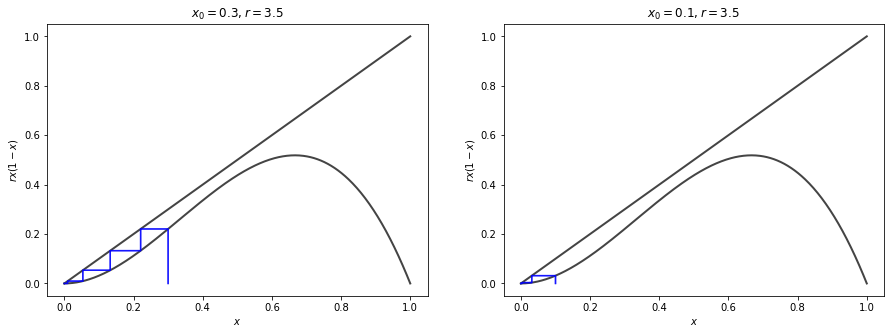

In [29]:
func = AnnotatedFunction(lambda x,r: r*x**2*(1-x), r'$rx(1-x)$')

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_cobweb(func, 3.5, 0.3, 2000)
plt.subplot(1, 2, 2)
plot_cobweb(func, 3.5, 0.1, 2000)
plt.show()

Como podemos ver (aunque son meros ejemplos, podríamos probar más), **da igual el valor $x_0$ que elija**: ante una r < 4, no hay puntos de estabilidad.

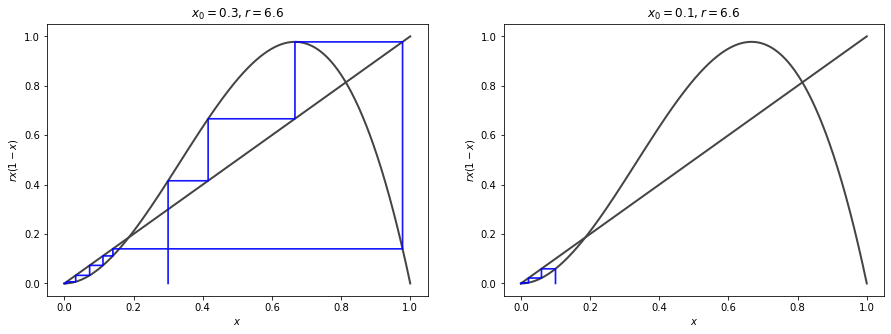

In [30]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_cobweb(func, 6.6, 0.3, 2000)
plt.subplot(1, 2, 2)
plot_cobweb(func, 6.6, 0.1, 2000)
plt.show()

Para valores mayores a 5.33 (pero intentando dejarlo dentro del valor de referencia r < 6.75 para mantener la utilidad biológica de estas aproximaciones) vemos que sucede lo mismo: aunque ahora sí que aparecen puntos fijos (es decir, que, a diferencia de en las gráficas anteriores, ***sí que existen puntos tales que f(x) = x**, pues la recta y el mapa se intersectan), estos **siguen sin ser estables**: la población se extingue inevitablemente 

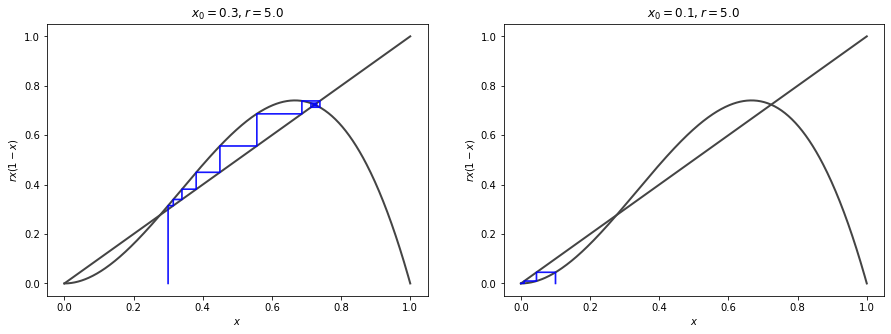

In [31]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_cobweb(func, 5.0, 0.3, 2000)
plt.subplot(1, 2, 2)
plot_cobweb(func, 5.0, 0.1, 2000)
plt.show()

Sin embargo, en los valores seleccionados, ¡eureka! encontramos un equilibrio válido para mantener a nuestra población sana y salva. Sin embargo, vemos que aún con estas, **no todos los valores de población inicial conllevan estabilidad**, sino que, para los dos puntos de equilibrio estables (la solución trivial y el llamado $x_2$), existe un **rango de valores**, o cuenca de atracción, bajo los cuales, las trayectorias que se inicien en dicha cantidad de población, evolucionarán a uno u otro punto de equilibrio.

Este tipo de sistemas, enlos que existen dos puntos de equilibrio y la manera de comportarse de los mimos depende de los valores de población incial, se denominan **biestables**, y el cálculo de las cuencas de atracción de cada punto será esencial para entender la evolución poblacional de las especies que sigan este régimen.

A continuación, se nos pide examinar el contenido de la función para dinámicas de segundo periodo; es decir, queremos encontrar puntos que sean **estables cada dos generaciones**. Así, lo primero sería calcular la función de segundo periodo: F(F(x))

In [32]:
f_2 = f.subs({"x":f})
f_2

r**3*x**4*(1 - x)**2*(-r*x**2*(1 - x) + 1)

In [33]:
#Y resuelvo para f(x) = x
criticos_2 = sp.solve(f_2-x, x)
criticos_2

[0, (r - sqrt(r**2 - 4*r))/(2*r), (r + sqrt(r**2 - 4*r))/(2*r)]

In [34]:
#Ahora, para los puntos fijos, calculo su derivada
derivada_2 = sp.simplify(sp.diff(f_2, x))
#Y sustituyo en ella el punto fijo, obteniendo una expresión
condicion_estable_2_pt1 = sp.simplify(derivada_2.subs({"x":criticos_2[1]}))
condicion_estable_2_pt1 #Que tiene que estar entre -1 y 1 para ser estable

r**2/2 - r*sqrt(r*(r - 4))/2 - 4*r + 3*sqrt(r*(r - 4)) + 9

In [35]:
#Y repito para el punto 2
condicion_estable_2_pt2 = sp.simplify(derivada_2.subs({"x":criticos_2[2]}))
condicion_estable_2_pt2 #Que tiene que estar entre -1 y 1 para ser estable

r**2/2 + r*sqrt(r*(r - 4))/2 - 4*r - 3*sqrt(r*(r - 4)) + 9

In [36]:
sp.solve(sp.Abs(condicion_estable_2_pt1) < 1)

False

In [37]:
sp.solve(sp.Abs(condicion_estable_2_pt2) < 1)

(4 < r) & (r < 16/3)

Curiosamente, obtengo los mismos valores para el primer periodo que para el segundo; es decir, que cualquier punto que sea estable de generación en generación lo será también cada dos generaciones, aparentemente. Vamos a ver cómo se vería esto en una gráfica:

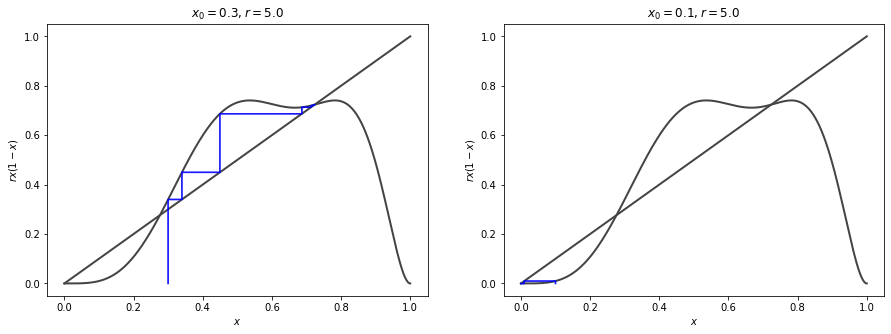

In [38]:
func = AnnotatedFunction(lambda x,r: r**3*x**4*(x-1)**2*(r*x**2*(x-1)+1), r'$rx(1-x)$')

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_cobweb(func, 5.0, 0.3, 2000)
plt.subplot(1, 2, 2)
plot_cobweb(func, 5.0, 0.1, 2000)
plt.show()

Como podemos ver, usando los mismos números que antes, efectivamente, el mismo punto es un atractor.

Finalmente, queremos sintetizar, en un sólo gráfico, el funcionamiento de la función objeto de estudio: esta es la gráfica de **bifurcación**, aunque también nos podría servir la gráfica de los **exponentes de Lyapunov**, que sin embargo es mucho más difícil de realizar en código de manera sencilla, con lo que nos quedaremos con la primera:

/tmp/ipykernel_16522/2430161262.py:10: RuntimeWarning: overflow encountered in double_scalars
  x_val = r_val*x_val**2*(1-x_val)


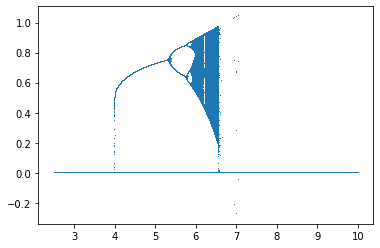

In [55]:
R = np.linspace(2.5,7,100000) #Aquí pongo los valores que quiera calcular de r

X = [] #Eje x: los valores de control del parámetro r
Y = [] #Eje y: valores del mapa del cubo

for r_val in R:
    X.append(r_val)
    x_val = np.random.random() #inicializo x para cada valor de r
    for n in range(100):
        x_val = r_val*x_val**2*(1-x_val)
    Y.append(x_val)
        
plt.plot(X, Y, ls="", marker=",")
plt.show()     

Como podemos ver, en esta gráfica relacionamos una serie de valores de r con sus correspondientes valores en el mapa del cubo; hasta ciertos valores, la población incial es demasiado baja, y es atraida al punto estable $x_{0} = 0$. Una vez llegamos a un cierto valor, la atracción cambia, y ahora los valores tienden al segundo punto fijo, que podemos llamar $x_{1}$. Una vez sobrepasamos el valor calculado anteriormente con symbolab, la condición de estabilidad del segundo punto ya no se cumple, por lo que **este punto se vuelve inestable y la función se bifurca**: aparecerán nuevos puntos estables de segundo orden, en torno a r = 6; según estos van aumentando, el proceso de desestabilización se repite, y nuevos puntos de otros órdenes aparecen; sin embargo, como vimos al comienzo del todo, a partir de r = 6.75 los valores dejan de tener relevancia biológica, por lo que, lo que es al caso de nuestro estudio actual, no nos resultaría relevante.

Sources:

* <a href="https://stackoverflow.com/questions/42288236/creating-a-bifurcation-diagram-in-python">Creating a Bifurcation Diagram in Python</a> en Stack Overflow  

* <a href="https://web.mat.upc.edu/rafael.ramirez/edis/snl.pdf"> Sistemas No Lineales,</a> de Rafael Ramírez

* <a href="https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/"> Plotting the bifurcation diagram of a chaotic dynamical system</a> en GitHub

* <a href="https://www.youtube.com/watch?v=BcVLeYV7DGQ"> Bifurcation diagram of Logistic map || Python</a> en Youtube

* <a href="http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html"> The Lyapunov exponent with Python</a>  - Graz University